<a href="https://colab.research.google.com/github/philsaurabh/Machine-Learning-Tutorials/blob/main/Credit_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

# Import dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Machine-Learning-Tutorials/main/Credit.csv')

In [3]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [4]:
df.shape

(400, 13)

In [5]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Defaultee
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.180000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.384669
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,0.000000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,0.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000


# Data Cleaning and Preprocessing

In [7]:
df.isnull().sum().sum()

0

0    0.82
1    0.18
Name: Defaultee, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


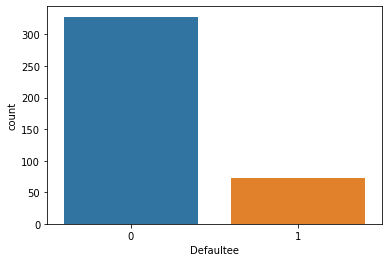

In [8]:
sns.countplot(df.Defaultee)
print (df.Defaultee.value_counts() / df.Defaultee.count())# Defaultee Value Percentage

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Student'] = df['Student'].map({'Yes': 1, 'No': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Ethnicity'] = df['Ethnicity'].map({'Caucasian': 1, 'Asian': 0,'African American':2})

In [10]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,14.891,3606,283,2,34,11,1,0,1,1,333,0
1,106.025,6645,483,3,82,15,0,1,1,0,903,0
2,104.593,7075,514,4,71,11,1,0,0,0,580,0
3,148.924,9504,681,3,36,11,0,0,0,0,964,0
4,55.882,4897,357,2,68,16,1,0,1,1,331,0


In [11]:
df.isnull().sum().sum()
#mean_value=df['Column_name'].mean()
#df['Column_name'].fillna(value=mean_value, inplace=True)

0

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum().sum()

0

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [15]:
X = df.drop(columns = ['Defaultee'])
y = df['Defaultee'].values

In [16]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [17]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [18]:
X

array([[-0.86158299, -0.48999879, -0.46553881, ...,  0.79539491,
         0.01058078, -0.40727698],
       [ 1.72743711,  0.82826106,  0.82870309, ...,  0.79539491,
        -1.40018942,  0.83405596],
       [ 1.68675551,  1.01478681,  1.02931059, ..., -1.25723711,
        -1.40018942,  0.13063396],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ...,  0.79539491,
         0.01058078, -0.83194351],
       [-0.21280808, -0.95891584, -1.05441888, ...,  0.79539491,
         0.01058078, -1.13247675],
       [-0.75334493,  0.34199278,  0.38866085, ..., -1.25723711,
        -1.40018942,  0.97125591]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 11), (80, 11), (320,), (80,))

In [21]:
model = LogisticRegression()#KNeighborsClassifier()#SVC#RandomForestClassifier()#AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('Train score is', score)
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Train score is 1.0
--
Precision score is  1.0
--
ROC Score is 1.0
--
Recall Score is  1.0
--
Confusion Matrix

 [[68  0]
 [ 0 12]]


# Additional Tasks

# ANOVA Table

In [30]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. StatsModels formula api uses Patsy to handle passing the formulas. 

2. To tell the model that a variable is categorical, it needs to be wrapped in C(independent_variable). 

3. By default, Patsy chooses the first categorical variable as the reference category; it's possible to change the reference category if desired. In order to do this, one needs to specify the reference category while one is specifying the variable is a categorical variable. 



In [35]:
model = smf.logit("Defaultee ~ Cards + Age + C(Gender)+C(Student)", data = df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.433578
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Defaultee   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                 0.08022
Time:                        06:07:57   Log-Likelihood:                -173.43
converged:                       True   LL-Null:                       -188.56
Covariance Type:            nonrobust   LLR p-value:                 4.349e-06
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.9293      0.601     -4.877      0.000      -4.107      -1.752
C(Gender)[T.1]      0.1069      0.274      0.390      0.697      -0.431       0.644
C(Student)[T.1]     1.8675      0.358      5.219      0.000       1.166       2.569
Cards               0.2112      0.095      2.216      0.027       0.024       0.398
Age                 0.0077      0.008      0.953      0.341      -0.008       0.024
===================================================================================
"""

Explanation of some of the terms in the summary table:

* **coef :** the coefficients of the independent variables in the regression equation.
* **Log-Likelihood :** the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
* **LL-Null :** the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
* **Pseudo R-squ. :** a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
score = cross_val_score(model, X_train, y_train, cv = 6)

In [23]:
#HoldOut Validation Approach- Train And Test Split
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)
#K Fold Cross Validation
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

1.0
[1.    0.975 1.    1.    1.    1.    1.    1.    0.975 1.   ]
0.9949999999999999


In [24]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.9949999999999999


In [25]:
scores

array([0.9875, 1.    , 1.    , 1.    , 0.9875])

In [26]:
from sklearn.model_selection import ShuffleSplit
model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)

In [27]:
results

array([1.        , 1.        , 1.        , 1.        , 0.99166667,
       1.        , 0.99166667, 0.99166667, 1.        , 0.99166667])

In [28]:
np.mean(results)

0.9966666666666667